# Stochastic 

Ruitao Wang

wangruitaox@gmail.com




This section serves as a reference and bulding block for further exploration into the quant finance world. Useful stochastic implementations in Python are experimented with examples. Maint contents (to be updates) would include:
* Random Number Generation
* Simulation

### Random Number Generation

In [4]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline     

In [5]:
sample_size = 10000

Here are random number generating function for commonly used distributions.
* standard normal
* Normal 
* Chi-Square
* Poisson
* Gamma
* Exponential

In [6]:
rn_sn = np.random.standard_normal(sample_size)
rn_normal = np.random.normal(10,20,sample_size)
rn_chi = np.random.chisquare(df=0.5, size = sample_size)
rn_po = np.random.poisson(lam=1,size=sample_size)
rn_gamma = np.random.gamma(shape=1, size=sample_size)
rn_ex = np.random.exponential(scale = 0.5, size = sample_size)
# standard normal, normal, Chi square, and poisson distribution respectively

Histogram Graph

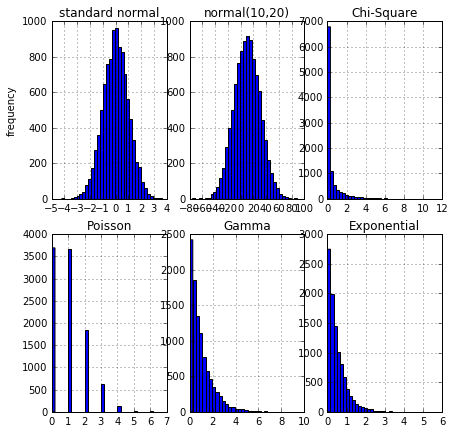

In [7]:
#visualization in terms of histogram
fig, ((ax1, ax2, ax3), (ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3,
                                             figsize=(7, 7))
ax1.hist(rn_sn,bins=35)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(rn_normal,bins=35)
ax2.set_title('normal(10,20)')
ax2.grid(True)
ax3.hist(rn_chi,bins=35)
ax3.set_title('Chi-Square')
ax3.grid(True)
ax4.hist(rn_po,bins=35)
ax4.set_title('Poisson')
ax4.grid(True)
ax5.hist(rn_gamma,bins=35)
ax5.set_title('Gamma')
ax5.grid(True)
ax6.hist(rn_ex,bins=35)
ax6.set_title('Exponential')
ax6.grid(True)

### Stochastic Process Simulation

#### Geometric Brownian Motion

$ dS_t = u S_t dt + \sigma S_t dW_t $

Firstly a simple Euler Schem for Geometric Brownian Motion

In [8]:
def GBM_Euler (s_0,u,sigma,T,n,I):
    #return (n+1)*I ndarray of Brownian Motion Simulation
    # s_0 is the current stock price
    # u is the drift term
    # sigma is the diffusion magnitued
    # T is the time length
    # n is the time step number
    # I is the iteration trial
    dt = T/n
    S = np.zeros((n+1,I))
    S[0]=s_0
    for t in range(1,n+1):
        S[t] = S[t - 1] * np.exp((u-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.standard_normal(I))
    return S

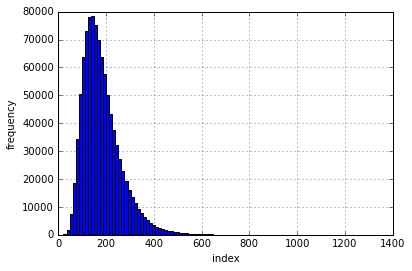

In [9]:
GBM = GBM_Euler(100,0.3,0.3,2,50,1000000)
plt.hist(GBM[-1],bins=100)
plt.xlabel('index')
plt.ylabel('frequency')
plt.grid(True)

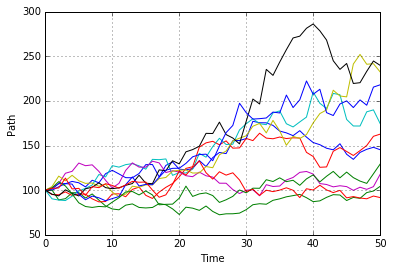

In [11]:
plt.plot(GBM[:,:10], lw=1)
plt.xlabel('Time')
plt.ylabel('Path')
plt.grid(True)